# Advanced Modeling 

In this exercice your aim is to increase the production of succinate in Yeast resorting to GECKO and ETFL formulations.

## GECKO model

Start by installing the `geckopy` package containing a model for yeast

In [1]:
!pip install geckopy --upgrade --quiet

and perform the necessary imports.

In [2]:
from geckopy.gecko import GeckoModel
from mewpy.problems import GeckoOUProblem
import pandas as pd

We may now load the GECKO yeast model

In [3]:
model = GeckoModel('single-pool')

We can use GECKO model to find genetic modifications that favor the production of succinate. However, instead of applying genetic modifications (deletions / up / down-regulations) by evaluating GPR rules, the modifications are imposed on the enzyme usage pseudo-reactions.

As the optimization tasks can be long, we will simulate previously obtained modification solutions. We will, nonetheless, define a problem but without any optimization objectives.

Start by defining the required identifiers and the medium. We will considere an aerobic medium with a maximum glucose and oxygen of uptake of 10 and 20 mmol/(gDW.h)

In [4]:
BIOMASS = 'r_2111'
GLC = 'r_1714'
O2 = 'r_1992'
# succinate
PRODUCT = 'r_2056'

medium = {GLC:(-10,10000),O2:(-20,10000)}

Define a GECKO up/down-regulation problem:

In [5]:
problem = GeckoOUProblem(model,[],envcond=medium)

In [6]:
sim = problem.simulator

## Exercice 1

**1.1:** Identify the list of essential proteins.


In [7]:
sim.essential_proteins()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 816/816 [02:57<00:00,  4.61it/s]


['P06197',
 'Q12055',
 'P40495',
 'P33312',
 'P39954',
 'P39522',
 'P07149',
 'P36421',
 'P18408',
 'P53045',
 'P04801',
 'P20051',
 'Q04728',
 'P00498',
 'P38145',
 'P00899',
 'P49367',
 'P38972',
 'P32462',
 'P32288',
 'P38998',
 'Q12122',
 'P28272',
 'P09436',
 'Q05506',
 'P07283',
 'P07244',
 'P21147',
 'P54839',
 'P31116',
 'Q12189',
 'P25340',
 'P24521',
 'P07285',
 'P04161',
 'P22768',
 'P19097',
 'P13188',
 'P38625',
 'P00937',
 'P18544',
 'P05694',
 'Q02196',
 'Q12109',
 'P11986',
 'P32377',
 'P07342',
 'P36148',
 'P08524',
 'P00958',
 'P05150',
 'P38707',
 'P32476',
 'P17423',
 'P08566',
 'P29704',
 'Q01217',
 'P04173',
 'Q12452',
 'P06168',
 'P07264',
 'P46655',
 'P04802',
 'Q05911',
 'P38708',
 'Q00955',
 'P19414',
 'P28777',
 'P80210']

**1.2:** For one randomly selected essential proteins identify the reactions it calatyzes and respective turnover, as well as its molecular weight.

In [12]:
sim.getKcat("P06197")

{'r_2454No1': 1631.986944104447,
 'r_2455No1': 1631.986944104447,
 'r_2456No1': 1631.986944104447,
 'r_2457No1': 1631.986944104447,
 'r_2458No1': 1631.986944104447,
 'r_2459No1': 1631.986944104447,
 'r_2460No1': 1631.986944104447,
 'r_2461No1': 1631.986944104447}

In [13]:
sim.find("P06197")

,id,name,lb,ub,stoichiometry,gpr
0,draw_prot_P06197,draw_prot_P06197,0.0,1000.0,"{'prot_pool_c': -24.8234, 'prot_P06197_c': 1.0}",YPR113W


**1.3:** Compute the wildtype production of succinate. 

In [14]:
sim.simulate(method='pFBA').find(PRODUCT)

,Reaction ID,Flux rate
0,r_2056,0.0
1,r_2056_REV,0.0


**1.4:** Compute the theoretical maximum production rate of succinate with a 95% confidence on growth.

In [16]:
sim.FVA(PRODUCT,obj_frac=0.95)

{'r_2056': [0.0, 1.4934295018021757]}

Consider the sets of genetic modifications below that resulted from GECKO optimizations: 

In [17]:
df = pd.read_csv('data/succ_yeast.csv')
df

,Modification,Size,BPCY,TargetFlux,WYIELD
0,"{'P07143': 0, 'P12695': 8, 'P32264': 4, 'Q1218...",5,0.955805,5.874193,1.854254
1,"{'P07143': 0, 'P12695': 8, 'Q06549': 16, 'P327...",9,0.947737,5.824609,3.824441
2,"{'P07143': 0, 'P32264': 16, 'P12695': 8, 'P072...",8,0.666016,6.060021,2.337248
3,"{'P07143': 0, 'P12695': 8, 'P36421': 0.125, 'Q...",5,0.189540,4.659503,3.824441
4,"{'P32419': 32, 'P06106': 2, 'P07262': 4, 'P164...",7,0.608419,7.478452,2.459736
5,"{'P28777': 0.125, 'P16451': 4, 'P07258': 4, 'P...",5,0.191607,4.710320,3.893614
6,"{'P16451': 4, 'P28777': 0.125, 'P07258': 4, 'P...",5,0.120300,2.957356,4.139504


You can retrieve the first solution using, for example, the command below:

In [35]:
solution = eval(df.iloc[2,0]) # the first 0 identifies the row index
solution

{'P07143': 0,
 'P32264': 16,
 'P12695': 8,
 'P07257': 0.125,
 'P53296': 0,
 'P54857': 0,
 'Q12189': 0.0625,
 'Q05533': 32}

### Exercice 2
Briefly analyse the solutions running phenotypic simulations (pFBA, lMOMA, ROOM and FVA) and plot the production envelopes

In [36]:
constraints = problem.solution_to_constraints(solution)

In [37]:
res = sim.simulate(method='ROOM',constraints=constraints)

In [38]:
res.find([PRODUCT,BIOMASS])

,Reaction ID,Flux rate
0,r_2056,6.059740
1,r_2111,0.106185
2,r_2056_REV,0.000000
3,r_2111_REV,0.000000


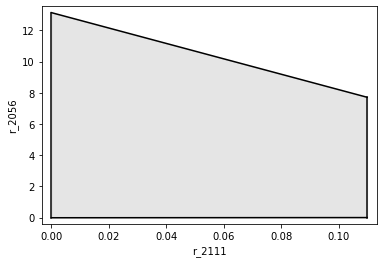

In [40]:
%matplotlib inline
from mewpy.visualization.envelope import plot_flux_envelope

plot_flux_envelope(sim,BIOMASS,PRODUCT,constraints = constraints)

## ETFL model

In [41]:
!pip install https://github.com/EPFL-LCSB/pytfa/archive/refs/heads/master.zip --quiet
!pip install https://github.com/EPFL-LCSB/etfl/archive/refs/heads/master.zip --quiet

In [42]:
from etfl.io.json import load_json_model
from mewpy.problems import ETFLGOUProblem

In [48]:
model = load_json_model('data/yeast8_vEFL_2584_enz_128_bins__20210908_192334.json','cplex')

2022-06-21 17:06:41,543 - ME modelyeast8_vEFL_2584_enz_128_bins__20210908_192334 - INFO - # ETFL Model ETFL_model initialized
2022-06-21 17:06:41,543 - ME modelyeast8_vEFL_2584_enz_128_bins__20210908_192334 - INFO - Empty model initialized
rebuilding constraints: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71110/71110 [00:23<00:00, 3037.41it/s]


Create a ETFLGOUProblem using the ETFL model

In [50]:
from mewpy.simulation import get_simulator
sim = get_simulator(model)

In [ ]:
problem = ETFLGOUProblem(model,[],envcond=medium)

In [ ]:
sim = problem.simulator

You may use the `find` function to identify gene (/protein) transcription, translation and degration pseudo reactions.

Genetic modifications on ETFL models use the gene identifier instead of the uniprot identifier, as such, we need to convert the IDs in the GECKO solutions for them to be simulated on ETFL models. The function below does that for you.

In [39]:
gp = pd.read_csv('data/prot_gene.csv')

def prot_to_gene(solution):
    ''' Convert a solution with protein identifier to a solution
    with gene identifiers
    '''
    def p2g(p):
        return gp.loc[gp.Protein==p,'Gene'].item()
    return {p2g(k):v for k,v in solution.items()}

### Exercice 3

We can now simulate the sets of genetic modification, used with the GECKO formulation, on the ETFL model.

In [46]:
prot_to_gene(solution)

{'YOR065W': 0,
 'YDR300C': 16,
 'YNL071W': 8,
 'YPR191W': 0.125,
 'YGR177C': 0,
 'YDR058C': 0,
 'YOR095C': 0.0625,
 'YDR287W': 32}

In [47]:
solution

{'P07143': 0,
 'P32264': 16,
 'P12695': 8,
 'P07257': 0.125,
 'P53296': 0,
 'P54857': 0,
 'Q12189': 0.0625,
 'Q05533': 32}